# This notebook is for exploring completeness of VirusSeq Data Portal Metadata
## Last Update: March 16 2022

### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from copy import deepcopy
from datetime import datetime

### Read the sample data and see what it looks like

In [3]:
seqs = pd.read_csv("data/files-archive-nov25.tsv", sep = "\t")
seqs.head()

,study_id,specimen collector sample ID,sample collected by,sequence submitted by,sample collection date,sample collection date null reason,geo_loc_name (country),geo_loc_name (state/province/territory),organism,isolate,...,consensus sequence software name,consensus sequence software version,breadth of coverage value,depth of coverage value,reference genome accession,bioinformatics protocol,gene name,diagnostic pcr Ct value,diagnostic pcr Ct value null reason,GISAID accession
0,UHTC-ON,UHTC_0451,Unity Health Toronto,Ontario Institute for Cancer Research (OICR),2020-10-06,NaN,Canada,Ontario,Not Provided,hCoV-19/Canada/ON-UHTC_0451/2021,...,ARTIC-nanopolish,1.1.3,Not Provided,988.5X,NaN,NaN,Not Provided,NaN,Not Provided,NaN
1,KHSC-ON,SLB3139,Queen's University / Kingston Health Sciences ...,Ontario Institute for Cancer Research (OICR),2020-04-25,NaN,Canada,Ontario,Not Provided,hCoV-19/Canada/ON-SLB3139/2021,...,ncov2019-artic-nf,OICR v1.6,Not Provided,1765.5X,NaN,NaN,Not Provided,NaN,Not Provided,NaN
2,UHTC-ON,UHTC_0435,Unity Health Toronto,Ontario Institute for Cancer Research (OICR),2020-12-11,NaN,Canada,Ontario,Not Provided,hCoV-19/Canada/ON-UHTC_0435/2021,...,ARTIC-nanopolish,1.1.3,Not Provided,449.0X,NaN,NaN,Not Provided,NaN,Not Provided,NaN
3,UHTC-ON,UHTC_0481,Unity Health Toronto,Ontario Institute for Cancer Research (OICR),2020-11-27,NaN,Canada,Ontario,Not Provided,hCoV-19/Canada/ON-UHTC_0481/2021,...,ARTIC-nanopolish,1.1.3,Not Provided,400.6X,NaN,NaN,Not Provided,NaN,Not Provided,NaN
4,KHSC-ON,SLB3121,Queen's University / Kingston Health Sciences ...,Ontario Institute for Cancer Research (OICR),2020-04-22,NaN,Canada,Ontario,Not Provided,hCoV-19/Canada/ON-SLB3121/2021,...,ncov2019-artic-nf,OICR v1.6,Not Provided,959.3X,NaN,NaN,Not Provided,NaN,Not Provided,NaN


### Print out all column names

In [4]:
print(seqs.columns)

Index(['study_id', 'specimen collector sample ID', 'sample collected by',
       'sequence submitted by', 'sample collection date',
       'sample collection date null reason', 'geo_loc_name (country)',
       'geo_loc_name (state/province/territory)', 'organism', 'isolate',
       'fasta header name', 'purpose of sampling',
       'purpose of sampling details', 'anatomical material', 'anatomical part',
       'body product', 'environmental material', 'environmental site',
       'collection device', 'collection method', 'host (scientific name)',
       'host disease', 'host age', 'host age null reason', 'host age unit',
       'host age bin', 'host gender', 'purpose of sequencing',
       'purpose of sequencing details', 'sequencing instrument',
       'sequencing protocol', 'raw sequence data processing method',
       'dehosting method', 'consensus sequence software name',
       'consensus sequence software version', 'breadth of coverage value',
       'depth of coverage value', 'r

### Remove the columns I'm not going to examine here

In [5]:
seqs.drop(columns=['study_id', 'specimen collector sample ID', 'sample collected by',
       'sequence submitted by',
       'sample collection date null reason', 'geo_loc_name (country)',
       'organism', 'isolate',
       'fasta header name',
       'purpose of sampling details', 'anatomical material', 'anatomical part',
       'body product', 'environmental material', 'environmental site',
       'collection device', 'collection method', 'host (scientific name)',
       'host disease','host age null reason', 'host age unit',
       'purpose of sequencing details',
       'sequencing protocol', 'raw sequence data processing method',
       'dehosting method', 'consensus sequence software name',
       'consensus sequence software version', 'reference genome accession',
       'bioinformatics protocol', 'gene name', 
       'diagnostic pcr Ct value null reason'], inplace = True)

In [6]:
seqs.head()

,sample collection date,geo_loc_name (state/province/territory),purpose of sampling,host age,host age bin,host gender,purpose of sequencing,sequencing instrument,breadth of coverage value,depth of coverage value,diagnostic pcr Ct value,GISAID accession
0,2020-10-06,Ontario,Not Provided,NaN,Not Applicable,Not Provided,Not Provided,Oxford Nanopore,Not Provided,988.5X,NaN,NaN
1,2020-04-25,Ontario,Not Provided,NaN,Not Applicable,Not Provided,Not Provided,Illumina,Not Provided,1765.5X,NaN,NaN
2,2020-12-11,Ontario,Not Provided,NaN,Not Applicable,Not Provided,Not Provided,Oxford Nanopore,Not Provided,449.0X,NaN,NaN
3,2020-11-27,Ontario,Not Provided,NaN,Not Applicable,Not Provided,Not Provided,Oxford Nanopore,Not Provided,400.6X,NaN,NaN
4,2020-04-22,Ontario,Not Provided,NaN,Not Applicable,Not Provided,Not Provided,Illumina,Not Provided,959.3X,NaN,NaN


### Let's replace the many forms of 'Not Provided' or NaN with np.nan and convert collection date to a date time object

In [7]:
seqs.replace({'Not Provided':np.nan, 'NaN':np.nan, 'Not Applicable':np.nan, 'Missing': np.nan}, inplace = True)
seqs['sample collection date'] = pd.to_datetime(seqs['sample collection date'])
seqs.head()

,sample collection date,geo_loc_name (state/province/territory),purpose of sampling,host age,host age bin,host gender,purpose of sequencing,sequencing instrument,breadth of coverage value,depth of coverage value,diagnostic pcr Ct value,GISAID accession
0,2020-10-06,Ontario,NaN,NaN,NaN,NaN,NaN,Oxford Nanopore,NaN,988.5X,NaN,NaN
1,2020-04-25,Ontario,NaN,NaN,NaN,NaN,NaN,Illumina,NaN,1765.5X,NaN,NaN
2,2020-12-11,Ontario,NaN,NaN,NaN,NaN,NaN,Oxford Nanopore,NaN,449.0X,NaN,NaN
3,2020-11-27,Ontario,NaN,NaN,NaN,NaN,NaN,Oxford Nanopore,NaN,400.6X,NaN,NaN
4,2020-04-22,Ontario,NaN,NaN,NaN,NaN,NaN,Illumina,NaN,959.3X,NaN,NaN


### What percent of the data is missing?

In [8]:
seqs.isna().sum()/len(seqs)*100

sample collection date                      0.000000
geo_loc_name (state/province/territory)     0.000000
purpose of sampling                        21.533453
host age                                   92.793075
host age bin                               51.925359
host gender                                47.684539
purpose of sequencing                      41.377412
sequencing instrument                       0.000000
breadth of coverage value                   0.105356
depth of coverage value                    25.508509
diagnostic pcr Ct value                    73.663829
GISAID accession                            1.722714
dtype: float64

### All samples have associated collection dates!
### Let's try grouping data by province to see if there's a pattern to what is missing.

In [9]:
seqs.columns = ['collection_date', 'province', 'sampling_purpose', 'age', 'age_bin', 'gender', 'sequencing_purpose', 'sequencing_instrument',
'coverage_breadth', 'coverage_depth', 'Ct', 'gisaid_accession']
counts = seqs.groupby('province').count()
totals = counts['collection_date']
seqs.groupby('province').count().rsub(seqs.groupby('province').size(), axis = 0).divide(totals, axis = 0)

,collection_date,sampling_purpose,age,age_bin,gender,sequencing_purpose,sequencing_instrument,coverage_breadth,coverage_depth,Ct,gisaid_accession
province,,,,,,,,,,,
Alberta,0.0,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.941709,1.000000,0.061428
British Columbia,0.0,0.650661,1.000000,0.378102,0.379226,0.377842,0.0,0.000000,0.000000,1.000000,0.000000
Manitoba,0.0,0.000000,0.021548,0.000000,0.000000,0.024486,0.0,0.000000,0.000000,0.121450,0.000000
New Brunswick,0.0,0.000000,1.000000,0.031558,0.009862,0.031558,0.0,0.000000,0.000000,0.177515,0.000000
Newfoundland and Labrador,0.0,0.000000,0.013514,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Nova Scotia,0.0,0.000000,1.000000,0.045757,0.009983,0.366889,0.0,0.000000,0.000000,0.088186,0.000000
Ontario,0.0,0.003739,1.000000,0.334512,0.190231,0.999090,0.0,0.003739,0.022638,0.404986,0.003739
Saskatchewan,0.0,0.000000,0.382702,0.376824,0.360172,0.033696,0.0,0.000000,0.007836,0.277304,0.000000


Some of the provinces are missing very little data overall (NL, NS, MB), while those that are missing lots of data seem to have data missing from common fields (age, age bin, gender). Some missing fields are unique to provinces (only BC is missing sampling purpose).

### How many samples are there from each province?

In [10]:
seqs.groupby('province').size()

province
Alberta                      27740
British Columbia             34697
Manitoba                      1021
New Brunswick                  507
Newfoundland and Labrador      296
Nova Scotia                   1202
Ontario                      29685
Saskatchewan                 10209
dtype: int64

### How many complete values are there from each province in each field?

In [11]:
counts

,collection_date,sampling_purpose,age,age_bin,gender,sequencing_purpose,sequencing_instrument,coverage_breadth,coverage_depth,Ct,gisaid_accession
province,,,,,,,,,,,
Alberta,27740,27740,0,0,0,27740,27740,27740,1617,0,26036
British Columbia,34697,12121,0,21578,21539,21587,34697,34697,34697,0,34697
Manitoba,1021,1021,999,1021,1021,996,1021,1021,1021,897,1021
New Brunswick,507,507,0,491,502,491,507,507,507,417,507
Newfoundland and Labrador,296,296,292,296,296,296,296,296,296,296,296
Nova Scotia,1202,1202,0,1147,1190,761,1202,1202,1202,1096,1202
Ontario,29685,29574,0,19755,24038,27,29685,29574,29013,17663,29574
Saskatchewan,10209,10209,6302,6362,6532,9865,10209,10209,10129,7378,10209


### What proportion of each field is complete for each province?

In [12]:
seqs_comp = deepcopy(pd.DataFrame(seqs))
seqs_comp = seqs_comp.groupby('province').count()

seqs_comp.divide(totals, axis = 0)

,collection_date,sampling_purpose,age,age_bin,gender,sequencing_purpose,sequencing_instrument,coverage_breadth,coverage_depth,Ct,gisaid_accession
province,,,,,,,,,,,
Alberta,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000,0.058291,0.000000,0.938572
British Columbia,1.0,0.349339,0.000000,0.621898,0.620774,0.622158,1.0,1.000000,1.000000,0.000000,1.000000
Manitoba,1.0,1.000000,0.978452,1.000000,1.000000,0.975514,1.0,1.000000,1.000000,0.878550,1.000000
New Brunswick,1.0,1.000000,0.000000,0.968442,0.990138,0.968442,1.0,1.000000,1.000000,0.822485,1.000000
Newfoundland and Labrador,1.0,1.000000,0.986486,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000
Nova Scotia,1.0,1.000000,0.000000,0.954243,0.990017,0.633111,1.0,1.000000,1.000000,0.911814,1.000000
Ontario,1.0,0.996261,0.000000,0.665488,0.809769,0.000910,1.0,0.996261,0.977362,0.595014,0.996261
Saskatchewan,1.0,1.000000,0.617298,0.623176,0.639828,0.966304,1.0,1.000000,0.992164,0.722696,1.000000


### Save .csv file

In [13]:
seq_proportions = seqs_comp.divide(totals, axis = 0)
seq_proportions.to_csv('data/data_portal_proportions.csv', index = True)

### Let's explore the column values in more detail

In [13]:
print(seqs.columns)

Index(['collection_date', 'province', 'sampling_purpose', 'age', 'age_bin',
       'gender', 'sequencing_purpose', 'sequencing_instrument',
       'coverage_breadth', 'coverage_depth', 'Ct', 'gisaid_accession'],
      dtype='object')


In [14]:
cols = ['province', 'sampling_purpose', 'age', 'age_bin',
       'gender', 'sequencing_purpose', 'sequencing_instrument',
       'coverage_breadth', 'coverage_depth', 'Ct', 'gisaid_accession']

In [15]:
print(seqs.sampling_purpose.unique())

[nan 'Diagnostic testing' 'Restricted Access']


In [16]:
print(seqs.age_bin.unique())

[nan '60 - 69' '40 - 49' '50 - 59' '20 - 29' '30 - 39' '70 - 79' '80 - 89'
 '0 - 9' '10 - 19' 'Restricted Access' '90+']


In [17]:
print(seqs.gender.unique())

[nan 'Male' 'Female' 'Restricted Access']


In [18]:
print(seqs.sequencing_purpose.unique())

[nan 'Baseline surveillance (random sampling)'
 'Vaccine escape surveillance' 'Cluster/Outbreak investigation'
 'Targeted surveillance (non-random sampling)'
 'Screening for Variants of Concern (VoC)'
 'Travel-associated surveillance' 'Restricted Access' 'Research'
 'Not Collected' 'International travel surveillance'
 'Priority surveillance project' 'Domestic travel surveillance'
 'Re-infection surveillance']


In [19]:
print(seqs.sequencing_instrument.unique())

['Oxford Nanopore' 'Illumina' 'Illumina MiSeq' 'Illumina NextSeq'
 'Oxford Nanopore MinION' 'Illumina NextSeq 2000'
 'Oxford Nanopore GridION' 'Illumina NextSeq 550' 'Illumina NovaSeq 6000'
 'Illumina iSeq 100']


In [20]:
print(seqs.Ct.unique())

[  nan 14.2  12.4  ... 28.83 14.41 29.28]


### Let's figure out how many samples are in the portal from each province by collection month

In [21]:
seqs['year_month'] = pd.to_datetime(seqs['collection_date']).dt.to_period('M')
seqs.head()

,collection_date,province,sampling_purpose,age,age_bin,gender,sequencing_purpose,sequencing_instrument,coverage_breadth,coverage_depth,Ct,gisaid_accession,year_month
0,2020-10-06,Ontario,NaN,NaN,NaN,NaN,NaN,Oxford Nanopore,NaN,988.5X,NaN,NaN,2020-10
1,2020-04-25,Ontario,NaN,NaN,NaN,NaN,NaN,Illumina,NaN,1765.5X,NaN,NaN,2020-04
2,2020-12-11,Ontario,NaN,NaN,NaN,NaN,NaN,Oxford Nanopore,NaN,449.0X,NaN,NaN,2020-12
3,2020-11-27,Ontario,NaN,NaN,NaN,NaN,NaN,Oxford Nanopore,NaN,400.6X,NaN,NaN,2020-11
4,2020-04-22,Ontario,NaN,NaN,NaN,NaN,NaN,Illumina,NaN,959.3X,NaN,NaN,2020-04


In [24]:
months_counts = pd.DataFrame(seqs.groupby(['province', 'year_month']).size())
totals = months_counts[0]
totals

province      year_month
Alberta       2020-03        133
              2020-04       1189
              2020-05        298
              2020-07          1
              2020-08          1
                            ... 
Saskatchewan  2021-05       1217
              2021-06       1159
              2021-07        298
              2021-08       1246
              2021-09       1384
Name: 0, Length: 132, dtype: int64

### Let's see if data completeness varies by collection date

In [25]:
seqs_comp_month = deepcopy(pd.DataFrame(seqs))
seqs_comp_month = seqs_comp_month.groupby(['province', 'year_month']).count()
seqs_comp_month.divide(totals, axis = 0)

collection_date  sampling_purpose       age  \
province     year_month                                                
Alberta      2020-03                 1.0               1.0  0.000000   
             2020-04                 1.0               1.0  0.000000   
             2020-05                 1.0               1.0  0.000000   
             2020-07                 1.0               1.0  0.000000   
             2020-08                 1.0               1.0  0.000000   
...                                  ...               ...       ...   
Saskatchewan 2021-05                 1.0               1.0  0.640920   
             2021-06                 1.0               1.0  0.617774   
             2021-07                 1.0               1.0  0.996644   
             2021-08                 1.0               1.0  0.995185   
             2021-09                 1.0               1.0  0.985549   

                          age_bin    gender  sequencing_purpose  \
province     year_month                                           
Alberta      2020-03     0.000000  0.000000            1.000000   
             2020-04     0.000000  0.000000            1.000000   
             2020-05     0.000000  0.000000            1.000000   
             2020-07     0.000000  0.000000            1.000000   
             2020-08     0.000000  0.000000            1.000000   
...                           ...       ...                 ...   
Saskatchewan 2021-05     0.644207  0.644207            1.000000   
             2021-06     0.620362  0.620362            0.999137   
             2021-07     1.000000  1.000000            0.761745   
             2021-08     1.000000  1.000000            1.000000   
             2021-09     1.000000  1.000000            1.000000   

                         sequencing_instrument  coverage_breadth  \
province     year_month                                            
Alberta      2020-03                       1.0               1.0   
             2020-04                       1.0               1.0   
             2020-05                       1.0               1.0   
             2020-07                       1.0               1.0   
             2020-08                       1.0               1.0   
...                                        ...               ...   
Saskatchewan 2021-05                       1.0               1.0   
             2021-06                       1.0               1.0   
             2021-07                       1.0               1.0   
             2021-08                       1.0               1.0   
             2021-09                       1.0               1.0   

                         coverage_depth        Ct  gisaid_accession  
province     year_month                                              
Alberta      2020-03           1.000000  0.000000          1.000000  
             2020-04           0.999159  0.000000          0.999159  
             2020-05           0.993289  0.000000          1.000000  
             2020-07           0.000000  0.000000          0.000000  
             2020-08           0.000000  0.000000          1.000000  
...                                 ...       ...               ...  
Saskatchewan 2021-05           1.000000  0.740345          1.000000  
             2021-06           1.000000  1.000000          1.000000  
             2021-07           1.000000  1.000000          1.000000  
             2021-08           1.000000  0.991172          1.000000  
             2021-09           0.942197  0.149566          1.000000  

[132 rows x 11 columns]

### Save to csv file

In [19]:
seqs_comp_month.to_csv('data/data_portal_proportions_month.csv', index = True)

### As a preliminary sanity check, let's see whether genome coverage breadth correlates inversely with Ct value

In [27]:
seqs_model = deepcopy(seqs)
seqs_model.drop(columns = ['sampling_purpose', 'sequencing_purpose', 'gisaid_accession'], inplace =True)
seqs_model

,collection_date,province,age,age_bin,gender,sequencing_instrument,coverage_breadth,coverage_depth,Ct,year_month
0,2020-10-06,Ontario,NaN,NaN,NaN,Oxford Nanopore,NaN,988.5X,NaN,2020-10
1,2020-04-25,Ontario,NaN,NaN,NaN,Illumina,NaN,1765.5X,NaN,2020-04
2,2020-12-11,Ontario,NaN,NaN,NaN,Oxford Nanopore,NaN,449.0X,NaN,2020-12
3,2020-11-27,Ontario,NaN,NaN,NaN,Oxford Nanopore,NaN,400.6X,NaN,2020-11
4,2020-04-22,Ontario,NaN,NaN,NaN,Illumina,NaN,959.3X,NaN,2020-04
...,...,...,...,...,...,...,...,...,...,...
105352,2021-04-28,British Columbia,NaN,70 - 79,Female,Illumina NextSeq 2000,99.4%,580x,NaN,2021-04
105353,2021-03-31,British Columbia,NaN,30 - 39,Female,Illumina MiSeq,94.2%,242x,NaN,2021-03
105354,2021-04-27,British Columbia,NaN,40 - 49,Male,Illumina NextSeq 2000,99.4%,567x,NaN,2021-04
105355,2021-08-04,British Columbia,NaN,30 - 39,Female,Illumina NextSeq 2000,99.4%,572x,NaN,2021-08


### Remove percentage signs and 'x' characters from coverage columns

In [28]:
print(seqs_model.dtypes)
seqs_model['coverage_breadth'] = seqs_model['coverage_breadth'].astype('str')
seqs_model['coverage_depth'] = seqs_model['coverage_depth'].astype('str')
seqs_model['coverage_breadth'] = seqs_model['coverage_breadth'].map(lambda x: x.rstrip('%'))
seqs_model['coverage_depth'] = seqs_model['coverage_depth'].map(lambda x: x.rstrip('Xx'))
seqs_model

collection_date          datetime64[ns]
province                         object
age                             float64
age_bin                          object
gender                           object
sequencing_instrument            object
coverage_breadth                 object
coverage_depth                   object
Ct                              float64
year_month                    period[M]
dtype: object


,collection_date,province,age,age_bin,gender,sequencing_instrument,coverage_breadth,coverage_depth,Ct,year_month
0,2020-10-06,Ontario,NaN,NaN,NaN,Oxford Nanopore,nan,988.5,NaN,2020-10
1,2020-04-25,Ontario,NaN,NaN,NaN,Illumina,nan,1765.5,NaN,2020-04
2,2020-12-11,Ontario,NaN,NaN,NaN,Oxford Nanopore,nan,449.0,NaN,2020-12
3,2020-11-27,Ontario,NaN,NaN,NaN,Oxford Nanopore,nan,400.6,NaN,2020-11
4,2020-04-22,Ontario,NaN,NaN,NaN,Illumina,nan,959.3,NaN,2020-04
...,...,...,...,...,...,...,...,...,...,...
105352,2021-04-28,British Columbia,NaN,70 - 79,Female,Illumina NextSeq 2000,99.4,580,NaN,2021-04
105353,2021-03-31,British Columbia,NaN,30 - 39,Female,Illumina MiSeq,94.2,242,NaN,2021-03
105354,2021-04-27,British Columbia,NaN,40 - 49,Male,Illumina NextSeq 2000,99.4,567,NaN,2021-04
105355,2021-08-04,British Columbia,NaN,30 - 39,Female,Illumina NextSeq 2000,99.4,572,NaN,2021-08


### Drop all rows where coverage info is absent, change data type to float

In [29]:
seqs_model.dropna(subset=['coverage_breadth', 'coverage_depth', 'Ct'], inplace = True)
seqs_model['coverage_breadth'] = seqs_model['coverage_breadth'].astype('float64')
seqs_model['coverage_depth'] = seqs_model['coverage_depth'].astype('float64')
seqs_model

,collection_date,province,age,age_bin,gender,sequencing_instrument,coverage_breadth,coverage_depth,Ct,year_month
7,2021-06-19,Ontario,NaN,NaN,Male,Illumina MiSeq,98.8,1608.0,14.20,2021-06
8,2021-06-24,Ontario,NaN,60 - 69,Male,Illumina NextSeq,98.6,4202.0,12.40,2021-06
9,2021-06-19,Ontario,NaN,40 - 49,Male,Illumina MiSeq,99.0,1982.0,17.30,2021-06
10,2021-06-24,Ontario,NaN,50 - 59,Male,Illumina NextSeq,99.6,3583.0,15.90,2021-06
11,2021-06-24,Ontario,NaN,60 - 69,Male,Illumina NextSeq,98.5,3419.0,13.10,2021-06
...,...,...,...,...,...,...,...,...,...,...
102272,2021-09-02,Saskatchewan,34.0,30 - 39,Female,Illumina MiSeq,99.4,375.0,14.41,2021-09
102292,2021-06-11,Saskatchewan,18.0,10 - 19,Female,Illumina MiSeq,99.4,542.0,17.23,2021-06
102299,2021-05-18,Saskatchewan,12.0,10 - 19,Female,Illumina MiSeq,99.4,111.0,29.28,2021-05
102365,2021-07-16,Saskatchewan,0.0,0 - 9,Female,Illumina MiSeq,99.4,394.0,20.22,2021-07


### Subset dataset to Ct values greater than 1 and less than 45

In [30]:
seqs_model = seqs_model[seqs_model['Ct'] < 45]
seqs_model = seqs_model[seqs_model['Ct'] > 1]

### Down-sample dataset so that we can visualize well with a jointplot

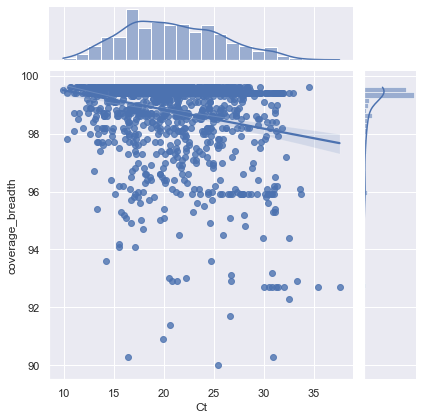

In [47]:
perc = 0.05

df_sub = seqs_model.sample(n=int(seqs_model.shape[0]*perc))
sns.set_theme(style = "darkgrid")
sns.set(rc={'figure.figsize':(20,20)})
sns.jointplot(x = 'Ct', y='coverage_breadth', kind = 'reg', data = df_sub)
